In [1]:
## Importing required Libraries
import os
import tensorflow as tf
from tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

In [2]:
df = pd.read_csv("User_Journey_Based_Features.csv")

#Make categorical columns as numerical
df['weekday']=df['weekday'].replace(['Mon','Tue','Wed','Thu','Fr','Sat','Sun'],[1,2,3,4,5,6,7])
df['timeOfDay']=df['timeOfDay'].replace(['Dawn','EarlyMorning','Morning','Noon','Afternoon','Evening','Night'],[1,2,3,4,5,6,7])
print(df.shape)
df.head()

(1076360, 16)


,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,InsessionCart,InsessionView,year,month,weekday,timeOfDay,Weekend,Purchase,cluster
0,1,1,0.0,939.28,939.28,0,0,0,0,2019,11,5,2,0,1,0
1,1,1,0.0,202.30,202.30,0,0,0,0,2019,11,7,5,0,1,0
2,1,1,0.0,617.52,617.52,0,0,0,0,2019,11,5,5,0,1,0
3,1,1,0.0,89.58,89.58,0,0,0,0,2019,11,6,2,0,1,0
4,1,1,0.0,46.33,46.33,0,0,0,0,2019,11,2,2,0,1,0


In [3]:
# Next, to analyze composition of each cluster

In [4]:
column_values = df["cluster"]. values. ravel()
unique_values_a = np.array(pd.unique(column_values))
unique_values=np.sort(unique_values_a)
print(unique_values)


[0 1 2 3 4]


In [5]:
purchase_percentage=np.zeros(np.shape(unique_values))
representation_percentage=np.zeros(np.shape(unique_values))
for index, item in enumerate(unique_values):
    locations=df.loc[df['cluster'] == item]
    purchase=locations.loc[locations['Purchase']==1]
    print('Number of records in cluster', item, '=', locations.shape[0])
    representation_percentage[index]=round((locations.shape[0]/df.shape[0])*100,2)
    purchase_percentage[index]=round((purchase.shape[0]/locations.shape[0])*100,2)
    
    

Number of records in cluster 0 = 1066615
Number of records in cluster 1 = 2664
Number of records in cluster 2 = 559
Number of records in cluster 3 = 4621
Number of records in cluster 4 = 1901


[9.909e+01 2.500e-01 5.000e-02 4.300e-01 1.800e-01]
[1.35 6.91 8.59 6.47 7.68]


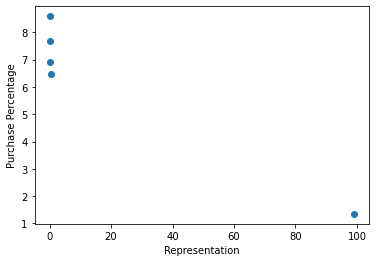

In [6]:
print((representation_percentage))
print(purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [7]:
print(np.sum(purchase_percentage))

31.0


In [8]:
total_purchase=df.loc[df['Purchase']==1]

In [9]:
purchase_distrib=total_purchase.shape[0]/df.shape[0]
print(purchase_distrib*100)

1.402597643910959


In [10]:
#Thus, cluster 0 is closest to average purchase ratio

In [11]:
#1. Lets find distances between clusters. Start with calinski-harabasz

In [12]:
X=np.array(df[df.columns[0:8]])
#X=np.array(df[df.columns[0:13]])
#Normalize X to aid compute
#X_n = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
Y=np.array(df[df.columns[15]])
#################################
#X=X[0:30000,:]
#Y=Y[0:30000]
#############################
pca = PCA(n_components=5)
pca.fit(X)
X1=pca.transform(X)

print(np.shape(X1))
#start with 2 clusters to 5 and show CH score increases as clusters increase

(1076360, 5)


In [13]:
X1_n = (X1-X1.min(axis=0)) / (X1.max(axis=0)-X1.min(axis=0))
X1=X1_n
print(X1[0:5,:])

[[6.13873989e-08 4.07296854e-01 1.20025576e-02 2.63611390e-01
  3.22195130e-01]
 [1.32213735e-08 1.40100233e-01 1.20699827e-02 2.63480629e-01
  3.22235297e-01]
 [4.03584696e-08 2.90640791e-01 1.20319949e-02 2.63554301e-01
  3.22212666e-01]
 [5.85445128e-09 9.92329050e-02 1.20802953e-02 2.63460629e-01
  3.22241440e-01]
 [3.02780660e-09 8.35523521e-02 1.20842522e-02 2.63452955e-01
  3.22243797e-01]]


In [14]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

c_vals=[3,1,4,2]
locs=np.array([])
locations=np.where(Y==0)
locs=np.append(locs,locations).astype(int)
CH=[]
SS=[]
#To locate the cluster indices
for index, item in enumerate(c_vals):
    locations=np.where(Y==item)
    locs=np.append(locs,locations).astype(int)
    print(item)
    m=metrics.calinski_harabasz_score(X1[locs,:], Y[locs])
    #m=m/len(locs)
    CH.append(m)
    #SS.append(metrics.silhouette_score(X1[locs,:], Y[locs]))
    #print(metrics.calinski_harabasz_score(X[locs,:], Y[locs]))
    
print(CH)
print(SS)

3
1
4
2
[3286.3600820166107, 6337.977544178263, 10906.913388917223, 12280.125196231755]
[]


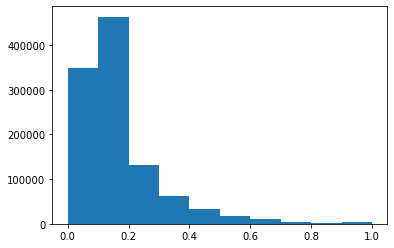

In [15]:
CH1=np.true_divide(CH,10**3)
#plt.plot([2,3,4,5],CH1)
#plt.plot([2,3,4,5],SS)
#plt.hist(X1[:,0],bins=100)
plt.hist(X1[:,1],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()

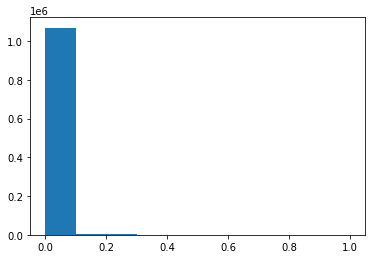

In [16]:
plt.hist(X1[:,0],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
#plt.plot(range(len(X1[:,0])),X1[:,0])
plt.show()
# Thirdcomponent has similar histogram. Top two are relevant

In [17]:
#OPTIONAL
#Bins=1000, size 10^-3 each
loc0=np.where(Y==0)
loc1=np.where(Y==1)
print(np.shape(X1[loc0,0]))
print(np.shape(X1[loc0,1]))
hist0,xbin_edges0, ybin_edges0=np.histogram2d(np.squeeze(X1[loc0,0]),np.squeeze(X1[loc0,1]))
#hist1,bin_edges1=np.histogram2d(X1[loc1,0],X1[loc1,1])
print(hist0)
print(xbin_edges0)
#print(hist1)
print(ybin_edges0)

(1, 1066615)
(1, 1066615)
[[6.84424e+05 2.01386e+05 7.19420e+04 5.58970e+04 1.48110e+04 1.51450e+04
  9.11900e+03 3.44700e+03 1.49600e+03 3.39800e+03]
 [5.40000e+02 2.12000e+02 7.70000e+01 9.30000e+01 1.00000e+01 1.00000e+01
  9.00000e+00 3.00000e+00 0.00000e+00 3.00000e+00]
 [4.13000e+02 1.50000e+02 5.20000e+01 7.90000e+01 7.00000e+00 1.20000e+01
  6.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [3.75000e+02 1.50000e+02 6.40000e+01 5.80000e+01 4.00000e+00 9.00000e+00
  1.00000e+01 1.00000e+00 0.00000e+00 0.00000e+00]
 [3.89000e+02 1.32000e+02 4.90000e+01 4.10000e+01 7.00000e+00 1.20000e+01
  3.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]
 [4.09000e+02 1.37000e+02 4.70000e+01 6.60000e+01 7.00000e+00 8.00000e+00
  5.00000e+00 0.00000e+00 2.00000e+00 1.00000e+00]
 [4.63000e+02 1.55000e+02 6.00000e+01 4.70000e+01 8.00000e+00 1.00000e+01
  7.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00]
 [3.11000e+02 1.22000e+02 3.10000e+01 3.60000e+01 9.00000e+00 9.00000e+00
  5.00000e+00 1.00000e+00

In [107]:
#Analyze histogram from each cluster
from scipy.stats import wasserstein_distance

#Step 1: find the histogram between clusters
def get_histogram(X):
    '''
    X=[nxd]
    '''
    r, c = np.shape(X)
    hist = [0.0] * 100001
    X=(100000*X).astype(int)
    
    for i in range(r):
        for j in range(c):
            hist[X[i,j]] += 1
    
    return np.array(hist) / (r * c)

In [108]:
#3. To find EMD between clusters


#Step 2: Compute EMD per pairwise cluster combinations
c_vals=[0,3,1,4,2] #These are the cluster names

dist=np.zeros((5,5))
for i in c_vals:
    for j in c_vals:
        #print(i,j)
        loci=np.where(Y==i)
        locj=np.where(Y==j)
        a = np.squeeze(X1[loci,:])
        b = np.squeeze(X1[locj,:])
        #print(np.shape(a),np.shape(b))
        a_hist = get_histogram(a)
        b_hist = get_histogram(b)
        dist[i,j] =wasserstein_distance(a_hist, b_hist)
        #dist[j,i]= wasserstein_distance(b_hist, a_hist)
dist=10**6*dist
print(dist)

[[ 0.         14.53972319 15.58323447 13.95096608 14.95252816]
 [14.53972319  0.         10.01929308  4.22581366  3.95567444]
 [15.58323447 10.01929308  0.         10.7529708  10.19992642]
 [13.95096608  4.22581366 10.7529708   0.          5.89840583]
 [14.95252816  3.95567444 10.19992642  5.89840583  0.        ]]


In [109]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='EMD',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('User Cluster')
    plt.xlabel('User Cluster')
    plt.show()


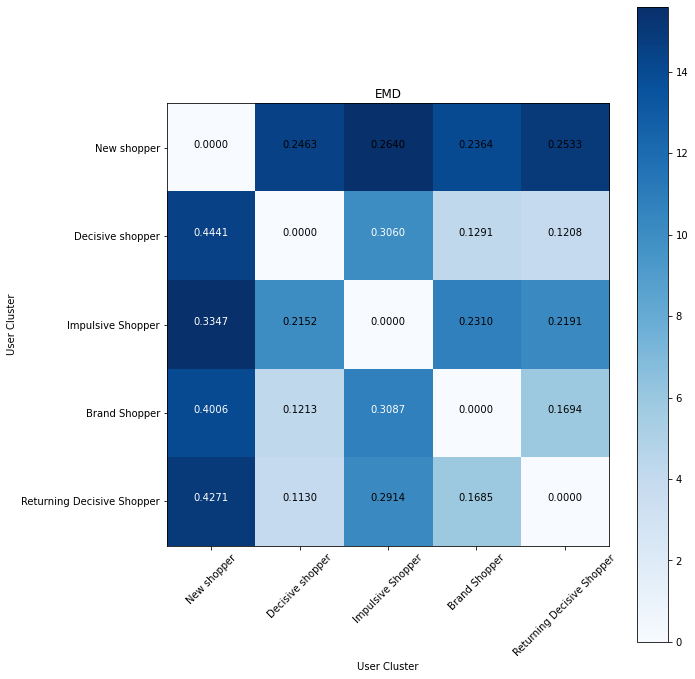

In [110]:
#from sklearn.metrics import ConfusionMatrixDisplay
labs=['New shopper','Decisive shopper','Impulsive Shopper','Brand Shopper','Returning Decisive Shopper']
#labs=c_vals
#disp = ConfusionMatrixDisplay(confusion_matrix=dist,display_labels=labs)
#disp.plot()
plot_confusion_matrix(dist,labs)

In [21]:
r,c=np.shape(X1)